# Лабораторная работа 3

На сетке узлов $\overline{\omega}_h$ найти численное решение смешанной задачи для одномерного уравнения колебаний струны с использованием:
- явной разностной схемы порядка аппроксимации $O(\tau^2 + h^2) $ с $\tau = h = 0.1$;  
- неявной разностной схемы $(\sigma = 0.5)$ порядка аппроксимации $O(\tau^2 + h^2)$ с $\tau = h = 0.1$.

Построить соответствующие разностные схемы. Вычислить погрешность численного
решения путем сравнения результатов с приведенным в задании аналитическим решением $u(x, t)$, т.е. найти $\max_{i,j}|y_i^j - u(x_i,t_j)|$.

Смешанная задача:   
$\begin{cases}
\frac{\partial^2u}{\partial t^2} = \frac{\partial^2u}{\partial x^2} & 0 < x < 1, 0 < t \leq 0.5 \\
u(x, 0) = 0 & 0 \leq x \leq 1 \\
\frac{\partial u(x,0)}{\partial t} = cos(x) & 0 \leq x \leq 1 \\
\frac{\partial u(0,t)}{\partial x} = u(0,t) - sin(t) & 0 \leq t \leq 0.5 \\
u(1,t) = sin(t)cos(1) & 0 \leq t \leq 0.5 \\
\end{cases}$   
Точное решение:
$u(x,t) = sin(t)cos(x)$

Построим явную разностную схему порядка аппроксимации $O(\tau^2 + h^2)$:   
$\begin{cases}
y_{\overline{t}t} = y_{\overline{x}x} + \varphi & x \in \omega_h, t \in \omega_{\tau} \\
y(x, 0) = 0 & x \in \overline{\omega_h} \\
y_t(0) = \tilde{u}_1(x) & x \in \overline{\omega}_h \\
\hat{y}_x(0) = y(0,t)-\tilde{\mu}_0(t) & t \in \overline{\omega}_{\tau} \\
y(1,t) = sin(t)cos(1) & t \in \overline{\omega}_{\tau} \\
\end{cases}$  

$\tilde{u}_1(x) = u_1(x) + \frac{\tau}{2}(u_0''(x) + f(x, 0))\\$
$\tilde{\mu}_0(t) = \mu_0(t) - \frac{h}{2}(\check{u}_{\overline{t}t}(0,t) - f(0,t))$

И в индексной форме:   
$\begin{cases}
\frac{y_i^{j+1} - 2y_i^j + y_i^{j-1}}{\tau^2} = \frac{y_{i+1}^{j} - 2y_i^{j} + y_{i-1}^{j}}{h^2} + f_i^{j} & i = \overline{1, N_1 - 1}, j = \overline{1, N_2 - 1} \\
y_i^0 = 0 & i = \overline{0, N_1} \\
\frac{y_i^1 - y_i^0}{\tau} = cos(x_i) + \frac{\tau}{2}(0 + f_i^0) & i = \overline{0, N_1} \\
\frac{y_1^{j+1} - y_0^{j+1}}{h} = y_0^{j+1} - sin(t_{j+1}) + \frac{h}{2}\left(\frac{y_0^{j+2} - 2y_0^j + y_0^{j-1}}{\tau^2} - f_0^{j+1}\right) & j = \overline{0, N_2-1} \\
y_{N_1}^{j} = sin(t_j)cos(1) & j = \overline{0, N_2} \\
\end{cases}$  

$\varphi = f$

Алгоритм:   
1) Заполняем нулевой слой: $y_i^0 = u_0(x_i), i = \overline{0, N_1}$
2) Заполняем первый:

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

def u(x, t):
    return math.sin(t)*math.cos(x)

def f(x, t):
    return 0

def u0(x):
    return 0

def u1(x):
    return math.cos(x)

def u_1(x, tau):
    return u1(x) + tau/2 * ( 0 + f(x, 0))

def mu0(t):
    return math.sin(t)

def mu_0(t, h, y, j):
    return y[j+1][0] - mu0(t) + h/2 * ((y[j + 2][0] - 2 * y[j][0] + y[j - 1][0])/(tau ** 2) - f(0, t))

def mu1(t):
    return math.sin(t) * math.cos(1)

In [2]:
h = 0.1
tau = 0.1
N1 = int(1 // h)
N2 = int(0.5 // tau)

x = [h * i for i in range(N1 + 1)]
t = [tau * j for j in range(N2 + 1)]
u_0 = [u0(t_) for t_ in t]

# mu_0_arr = []
# for t_ in t:
#     mu_0_arr.append(mu_0(t_))
mu_1 = [mu1(t_) for t_ in t]

    
phi = []
for j in range(N2 + 1):
    phi.append([])
    for i in range(N1 + 1):
        phi[j].append(f(x[i], t[j]))

y = []
y.append([u0(x_) for x_ in x])
y.append([y[0][i] for i in range(N1 + 1)])
for i in range(N1 + 1):
    y[1][i] += tau * u_1(x[i], tau) + y[0][i]
    
for j in range(1, N2):
    y.append([])
    for i in range(N1 + 1):
        if 0 < i < N1:
            y[j + 1].append(2 * y[j][i] - y[j - 1][i] + (tau ** 2)/(h ** 2) * (y[j][i + 1] - 2 * y[j][i] + y[j][i - 1]) + (tau ** 2) * phi[j][i])
            if i == 1: # <---------------------------------HERE
                y[j + 1][1] = (y[j + 1][0] - h * (mu0(t[j + 1]) + h/2 * (( - 2 * y[j][0] + y[j - 1][0])/(tau ** 2) - f(x[0], t[j + 1]))))/(1 - (h**2)/(2 * tau**2))
        elif i == 0:
            y[j + 1].append(0)
        elif i == N1:
            y[j + 1].append(mu_1[j + 1])

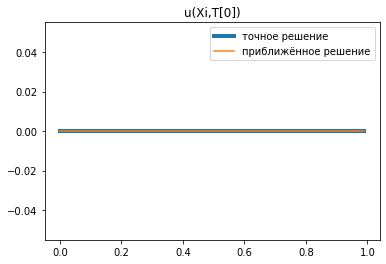

In [3]:
uxline0 = [u(xl, t[0]) for xl in x]
def drawx0(y1):
    plt.plot(x, uxline0, label='точное решение', linewidth=4)
    plt.plot(x, y1[0], label='приближённое решение')
    plt.title("u(Xi,T[0])")
    plt.legend(loc='best')
    plt.show()


utline0 = [u(x[0], tl) for tl in t]
def drawt0(y1, index):
    plt.plot(t, utline0, linewidth=4)
    plt.plot(t, np.transpose(y1)[index])
    plt.title("u(X[0],Tj)")
    plt.show()


uxline4 = [u(xl, t[4]) for xl in x]
def drawx4(y1):
    plt.plot(x, uxline4, label='точное решение', linewidth=4)
    plt.plot(x, y1[4], label='приближённое решение')
    plt.title("u(Xi,T[4])")
    plt.show()


utline4 = [u(x[4], tl) for tl in t]
def drawt4(y1):
    plt.plot(t, utline4, linewidth=4)
    plt.plot(t, np.transpose(y1)[4])
    plt.title("u(X[4],Tj)")
    plt.show()


drawx0(y)

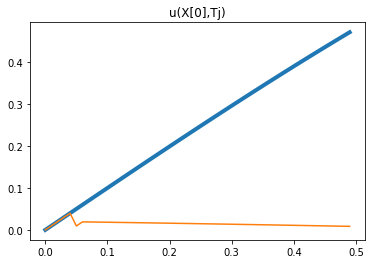

In [4]:
drawt0(y, 3)

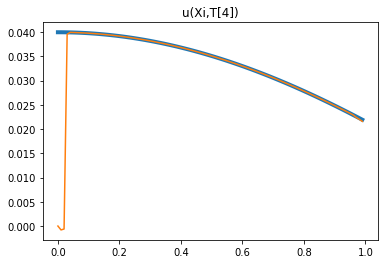

In [5]:
drawx4(y)

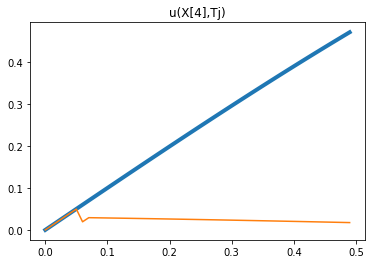

In [6]:
drawt4(y)

In [7]:
diff = []
for j in range(N2 + 1):
    diff.append([])
    for i in range(N1 + 1):
        diff[j].append(abs(y[j][i] - u(x[i], t[j])))

max_j = [max(d) for d in diff]
print("Невязка:")
print(max(max_j))

Невязка:
0.4800148748362661


Смешанная задача:

$\begin{cases}
\frac{\partial^2u}{\partial t^2} = \frac{\partial^2u}{\partial x^2} & 0 < x < 1, 0 < t \leq 0.5 \\
u(x, 0) = 0 & 0 \leq x \leq 1 \\
\frac{\partial u(x,0)}{\partial t} = cos(x) & 0 \leq x \leq 1 \\
\frac{\partial u(0,t)}{\partial x} = u(0,t) - sin(t) & 0 \leq t \leq 0.5 \\
u(1,t) = sin(t)cos(1) & 0 \leq t \leq 0.5 \\
\end{cases}$

Точное решение: $u(x,t) = sin(t)cos(x)$

Неявная разностная схема порядка $O(h^2 + \tau^2)$.

$\begin{cases}
y_{\overline{t}t} = \frac{1}{2}y_{\overline{x}x} + \frac{1}{2}\hat{y}_{\overline{x}x} + \phi(x, t) & x \in \overline{\omega_h} \\
y_t(0) = \tilde{u}_1(x) & x \in \overline{\omega}_h \\
\hat{y}_x(0) = y(0,t)+\tilde{\mu}_0(t) & t \in \overline{\omega}_{\tau} \\
y(1,t) = sin(t)cos(1) & t \in \overline{\omega}_{\tau} \\
\end{cases}$

$\tilde{u}_1(x) = u_1(x) - \frac{\tau}{2}(u_0''(x) + f(x, 0))$   
$\tilde{\mu}_0(t) = \mu_0(t) - \frac{h}{2}(\check{u}_{\overline{t}t}(0,t) - f(0,t))$

И в индексной форме:   
$\begin{cases}
\frac{1}{2h^2}y_{i - 1}^{j + 1} + \left(-\frac{1}{h^2} - \frac{1}{\tau^2} \right)y_i^{j + 1} + \frac{1}{2h^2}y_{i-1}^{j+1} = \frac{y_i^{j-1} - 2y_i^j}{\tau^2} - \frac{1}{2} \frac{y_{i+1}^{j-1} - 2y_i^{j-1} + y_{i-1}^{j-1}}{h^2} - f_i^j & i = \overline{1, N_1 - 1}, j = \overline{1, N_2 - 1} \\
y_i^0 = 0 & i = \overline{0, N_1} \\
y_i^1 - y_i^0 = \tau u_1(x_i) + \frac{\tau^2}{2}(0 + f_i^0) & i = \overline{0, N_1} \\
\left(\frac{1}{h} + \frac{h}{2\tau^2}\right)y_0^{j+1} - \frac{1}{h}y_1^{j+1} = -y_0^j+\mu_0(t_{j+1}) - \frac{h}{2}\left(\frac{y_0^{j-1} - 2y_0^j}{\tau^2} - f_0^j\right) & j = \overline{0, N_2-1} \\
y_{N_1}^{j} = sin(t)cos(1) & j = \overline{0, N_2} \\
\end{cases}$  

In [8]:
A = []
A = np.zeros((N1 + 1, N1 + 1))
for i in range(N1 + 1):
#     A.append([])
    for j in range(N1 + 1):
        if i == 0 and j == 0:
            A[i][j] = (1/h + h/(2 * tau ** 2))
        elif i == 0 and j == 1:
            A[i][j] = -1/h
        elif i == 0 and j != 0 and j != 1:
            A[i][j] = 0
        elif i == N1:
            if j == i:
                A[i][j] = 1
            else:
                A[i][j] = 0
        elif 0 < i < N1:
            if j == i:
                A[i][j] = (-1/h**2 - 1/tau**2)
            elif j == i - 1 or j == i + 1:
                A[i][j] = (1/(2*h**2))

                
y0 = []
for x_ in x:
    y0.append(u0(x_))
    
y1 = []
for i in range(N1 + 1):
    y1.append(y0[i] + tau * u1(x[i]) + tau**2 / 2 * (-4 * math.sin(2 * x[i]) + f(x[i], t[0])))

y0 = np.array(y0)
y1 = np.array(y1)
        
y = []
y.append(y0)
y.append(y1)

# for i in range(N1 + 1):
#     if i == 0:
#         yj.append(yj0)
#     else:
#         yj.append([])
        
for j in range(1, N2):
    b = []
    for i in range(N1 + 1):
        if i == 0:
            b.append(-y[j][0] + mu0(t[j + 1]) - h/2 * ((y[j-1][0] - 2*y[j][0])/tau**2 - f(x[0], t[j])))
        elif i == N1:
            b.append(mu1(t[j]))
        else:
            b.append((y[j-1][i] - 2*y[j][i])/tau**2 - 1/2 * (y[j-1][i+1] - 2*y[j-1][i] + y[j-1][i-1])/h**2 - f(x[i], t[j - 1]))
    y.append(np.dot(np.linalg.inv(A), b))

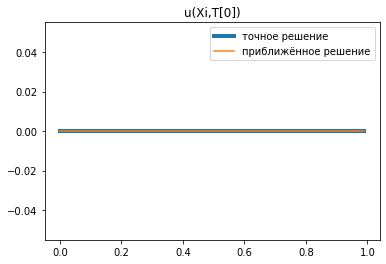

In [9]:
drawx0(y)

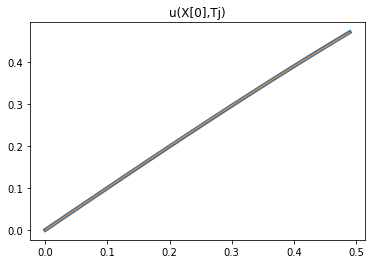

In [10]:
drawt0(y, 3)

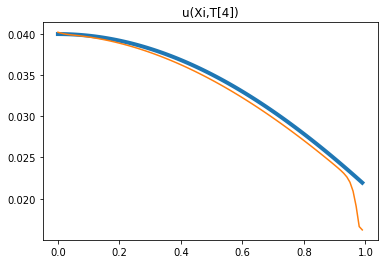

In [11]:
drawx4(y)

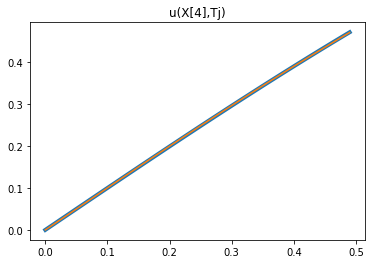

In [12]:
drawt4(y)

In [13]:
diff = []
for j in range(N2 + 1):
    diff.append([])
    for i in range(N1 + 1):
        diff[j].append(abs(y[j][i] - u(x[i], t[j])))

max_j = [max(d) for d in diff]
print("Невязка:")
print(max(max_j))

Невязка:
0.013553792703460521
